In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from experiments.globals import CP4IM_DATASET_NAMES, SYNTH_NUM_TREES
import time
from typing import Tuple, Dict, Any
from maptree import search as maptree_search
from experiments.searchers.binary_classification_tree import BinaryClassificationTree, split
from experiments.searchers.maptree import *
from experiments.globals import get_stratified_k_folds_cp4im_dataset, get_full_cp4im_dataset, run_search, save_results
import pdb
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [18]:
from maptree_treefarms_conv import *

In [5]:
# treefarms optimal tree for tic tac toe dataset
treefarms_opt_ttt_dict = {
  "false": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 0
        },
        "feature": 5,
        "name": "5",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 21,
      "name": "21",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 7,
        "name": "7",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 14,
        "name": "14",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 2,
      "name": "2",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 20,
        "name": "20",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 26,
  "model_objective": 0.22424083948135376,
  "name": "26",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 8,
        "name": "8",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 20,
      "name": "20",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 14,
    "name": "14",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.03141361474990845,
      "name": "27",
      "prediction": 1
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 0
        },
        "feature": 5,
        "name": "5",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 21,
      "name": "21",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 8,
        "name": "8",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 14,
        "name": "14",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 2,
      "name": "2",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 20,
        "name": "20",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 26,
  "model_objective": 0.22424083948135376,
  "name": "26",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 8,
        "name": "8",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 20,
      "name": "20",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 14,
    "name": "14",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.03141361474990845,
      "name": "27",
      "prediction": 1
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 8,
      "name": "8",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 13,
        "name": "13",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.020942408591508865,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 16,
      "name": "16",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 8,
      "name": "8",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 13,
        "name": "13",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.020942408591508865,
          "name": "27",
          "prediction": 0
        },
        "feature": 16,
        "name": "16",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 2,
      "name": "2",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.020942408591508865,
        "name": "27",
        "prediction": 1
      },
      "feature": 21,
      "name": "21",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 7,
        "name": "7",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 13,
    "name": "13",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 25,
      "name": "25",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 1
      },
      "feature": 7,
      "name": "7",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.020942408591508865,
          "name": "27",
          "prediction": 1
        },
        "feature": 21,
        "name": "21",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 13,
    "name": "13",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 11,
      "name": "11",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 1
        },
        "feature": 4,
        "name": "4",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "feature": 16,
      "name": "16",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 7,
        "name": "7",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 11,
    "name": "11",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 14,
        "name": "14",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.015706807374954224,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 2,
      "name": "2",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 20,
        "name": "20",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 26,
  "model_objective": 0.22424083948135376,
  "name": "26",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 8,
        "name": "8",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 20,
      "name": "20",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 14,
    "name": "14",
    "reference": 1,
    "relation": "==",
    "true": {
      "complexity": 0.009999999776482582,
      "loss": 0.03141361474990845,
      "name": "27",
      "prediction": 1
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.020942408591508865,
        "name": "27",
        "prediction": 1
      },
      "feature": 21,
      "name": "21",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "feature": 7,
        "name": "7",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 13,
    "name": "13",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 11,
      "name": "11",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}
{
  "false": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 0
      },
      "feature": 14,
      "name": "14",
      "reference": 1,
      "relation": "==",
      "true": {
        "complexity": 0.009999999776482582,
        "loss": 0.04188481718301773,
        "name": "27",
        "prediction": 1
      },
      "type": "integral"
    },
    "feature": 8,
    "name": "8",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 26,
        "name": "26",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 5,
      "name": "5",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.005235602147877216,
          "name": "27",
          "prediction": 1
        },
        "feature": 11,
        "name": "11",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "feature": 20,
  "model_objective": 0.22424083948135376,
  "name": "20",
  "reference": 1,
  "relation": "==",
  "true": {
    "false": {
      "false": {
        "complexity": 0.009999999776482582,
        "loss": 0.0,
        "name": "27",
        "prediction": 1
      },
      "feature": 7,
      "name": "7",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.020942408591508865,
          "name": "27",
          "prediction": 1
        },
        "feature": 21,
        "name": "21",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "feature": 13,
    "name": "13",
    "reference": 1,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 0
        },
        "feature": 23,
        "name": "23",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "feature": 25,
      "name": "25",
      "reference": 1,
      "relation": "==",
      "true": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "27",
          "prediction": 0
        },
        "feature": 2,
        "name": "2",
        "reference": 1,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.010471204295754433,
          "name": "27",
          "prediction": 1
        },
        "type": "integral"
      },
      "type": "integral"
    },
    "type": "integral"
  },
  "type": "integral"
}

print(make_bct(treefarms_opt_ttt_dict)) # works

((((5)21(7))11((14)2(20)))26(((8)20(23))14))


In [75]:
homepath = os.getcwd() # in the maptree folder

with open(f"{homepath}/ttt_treefarms_rset.json", 'r') as file:
    ttt_treefarms_rset = json.load(file)
# convert every tree to maptree 
ttt_treefarms_rset_maptree = {k: make_bct(v) for k, v in ttt_treefarms_rset.items()}

In [7]:
# getting posterior
dataset_name = CP4IM_DATASET_NAMES[13]
print(dataset_name)
data = get_full_cp4im_dataset(dataset_name)
X, y = data

tic-tac-toe


In [58]:
POSTERIOR = {
    'alpha': 0.95,
    'beta': 0.5,
    'rho': [2.5, 2.5],
}

for tree in ttt_treefarms_rset_maptree:
    ttt_treefarms_rset_maptree[str(tree)].fit(X, y)

ttt_treefarms_rset_maptree_posts = {k: v.log_posterior(X, y, **POSTERIOR) \
                                    for k, v in ttt_treefarms_rset_maptree.items()}

In [59]:
ttt_treefarms_rset_maptree_posts

{'0': -490.87275924946704,
 '1': -479.80876874020447,
 '2': -479.80876874020447,
 '3': -490.87275924946704,
 '4': -490.87275924946704,
 '5': -479.80876874020447,
 '6': -479.80876874020447,
 '7': -490.87275924946704,
 '8': -495.67217003078497,
 '9': -495.67217003078497,
 '10': -495.67217003078497,
 '11': -495.67217003078497,
 '12': -490.87275924946704,
 '13': -490.87275924946704,
 '14': -479.80876874020447,
 '15': -479.80876874020447,
 '16': -490.87275924946704,
 '17': -490.87275924946704,
 '18': -479.80876874020447,
 '19': -479.80876874020447,
 '20': -495.67217003078497,
 '21': -495.67217003078497,
 '22': -495.67217003078497,
 '23': -495.67217003078497,
 '24': -490.87275924946704,
 '25': -479.80876874020447,
 '26': -479.80876874020447,
 '27': -490.87275924946704,
 '28': -490.87275924946704,
 '29': -479.80876874020447,
 '30': -479.80876874020447,
 '31': -490.87275924946704,
 '32': -495.67217003078497,
 '33': -495.67217003078497,
 '34': -495.67217003078497,
 '35': -495.67217003078497,
 '

In [79]:
# treefarms tree number with max posterior
max(ttt_treefarms_rset_maptree_posts, key=ttt_treefarms_rset_maptree_posts.get)

'2584'

In [82]:
print_tree(parse_tree(ttt_treefarms_rset_maptree['2584'], X, y))

└── 2
    ├── 26
    │   ├── 14
    │   │   ├── | Prediction: 0
    │   │   └── | Prediction: 1
    │   └── 17
    │       ├── 20
    │       │   ├── | Prediction: 0
    │       │   └── | Prediction: 1
    │       └── 8
    │           ├── | Prediction: 0
    │           └── | Prediction: 1
    └── 14
        ├── 20
        │   ├── 8
        │   │   ├── | Prediction: 0
        │   │   └── | Prediction: 1
        │   └── 11
        │       ├── | Prediction: 0
        │       └── | Prediction: 1
        └── | Prediction: 1


In [81]:
# turn optimal maptree into dict representation to get treefarms objective

res = run(X, y)
tree_1 = res["tree"]
print(tree_1) # str rep of original tree (parentheses)
print(parse_tree(tree_1, X, y)) # dict representation of tree

(((19((25(22))1(10)))7((25(16))1(4)))13((20((26(23))2(11)))8((26(17))2(5))))
{'feature': 13, 'left': {'feature': 7, 'left': {'feature': 19, 'left': {'prediction': 1}, 'right': {'feature': 1, 'left': {'feature': 25, 'left': {'prediction': 1}, 'right': {'feature': 22, 'left': {'prediction': 1}, 'right': {'prediction': 0}}}, 'right': {'feature': 10, 'left': {'prediction': 1}, 'right': {'prediction': 0}}}}, 'right': {'feature': 1, 'left': {'feature': 25, 'left': {'prediction': 1}, 'right': {'feature': 16, 'left': {'prediction': 1}, 'right': {'prediction': 0}}}, 'right': {'feature': 4, 'left': {'prediction': 1}, 'right': {'prediction': 0}}}}, 'right': {'feature': 8, 'left': {'feature': 20, 'left': {'prediction': 0}, 'right': {'feature': 2, 'left': {'feature': 26, 'left': {'prediction': 0}, 'right': {'feature': 23, 'left': {'prediction': 0}, 'right': {'prediction': 1}}}, 'right': {'feature': 11, 'left': {'prediction': 0}, 'right': {'prediction': 1}}}}, 'right': {'feature': 2, 'left': {'featu

### Visualizing MAPtree

In [ ]:
print_tree(parse_tree(tree_1, X, y))

└── 13
    ├── 7
    │   ├── 19
    │   │   ├── | Prediction: 1
    │   │   └── 1
    │   │       ├── 25
    │   │       │   ├── | Prediction: 1
    │   │       │   └── 22
    │   │       │       ├── | Prediction: 1
    │   │       │       └── | Prediction: 0
    │   │       └── 10
    │   │           ├── | Prediction: 1
    │   │           └── | Prediction: 0
    │   └── 1
    │       ├── 25
    │       │   ├── | Prediction: 1
    │       │   └── 16
    │       │       ├── | Prediction: 1
    │       │       └── | Prediction: 0
    │       └── 4
    │           ├── | Prediction: 1
    │           └── | Prediction: 0
    └── 8
        ├── 20
        │   ├── | Prediction: 0
        │   └── 2
        │       ├── 26
        │       │   ├── | Prediction: 0
        │       │   └── 23
        │       │       ├── | Prediction: 0
        │       │       └── | Prediction: 1
        │       └── 11
        │           ├── | Prediction: 0
        │           └── | Prediction: 1
        └── 2
     

### Visualizing tree from Rashomon set with best posterior

In [ ]:
# treefarms tree number with max posterior
max(ttt_treefarms_rset_maptree_posts, key=ttt_treefarms_rset_maptree_posts.get)

'2584'

In [ ]:
print_tree(parse_tree(ttt_treefarms_rset_maptree['2584'], X, y))

└── 2
    ├── 26
    │   ├── 14
    │   │   ├── | Prediction: 0
    │   │   └── | Prediction: 1
    │   └── 17
    │       ├── 20
    │       │   ├── | Prediction: 0
    │       │   └── | Prediction: 1
    │       └── 8
    │           ├── | Prediction: 0
    │           └── | Prediction: 1
    └── 14
        ├── 20
        │   ├── 8
        │   │   ├── | Prediction: 0
        │   │   └── | Prediction: 1
        │   └── 11
        │       ├── | Prediction: 0
        │       └── | Prediction: 1
        └── | Prediction: 1


## Visualizing tree from Rashomon set with best treefarms objective

In [ ]:
print_tree(parse_tree(ttt_treefarms_rset_maptree['2952'], X, y))

└── 14
    ├── 2
    │   ├── 26
    │   │   ├── | Prediction: 0
    │   │   └── | Prediction: 1
    │   └── 20
    │       ├── 8
    │       │   ├── | Prediction: 0
    │       │   └── | Prediction: 1
    │       └── | Prediction: 1
    └── | Prediction: 1


In [28]:
print_tree(parse_tree(tree_1, X, y))

└── 13
    ├── 7
    │   ├── 19
    │   │   ├── | Prediction: 1
    │   │   └── 1
    │   │       ├── 25
    │   │       │   ├── | Prediction: 1
    │   │       │   └── 22
    │   │       │       ├── | Prediction: 1
    │   │       │       └── | Prediction: 0
    │   │       └── 10
    │   │           ├── | Prediction: 1
    │   │           └── | Prediction: 0
    │   └── 1
    │       ├── 25
    │       │   ├── | Prediction: 1
    │       │   └── 16
    │       │       ├── | Prediction: 1
    │       │       └── | Prediction: 0
    │       └── 4
    │           ├── | Prediction: 1
    │           └── | Prediction: 0
    └── 8
        ├── 20
        │   ├── | Prediction: 0
        │   └── 2
        │       ├── 26
        │       │   ├── | Prediction: 0
        │       │   └── 23
        │       │       ├── | Prediction: 0
        │       │       └── | Prediction: 1
        │       └── 11
        │           ├── | Prediction: 0
        │           └── | Prediction: 1
        └── 2
     

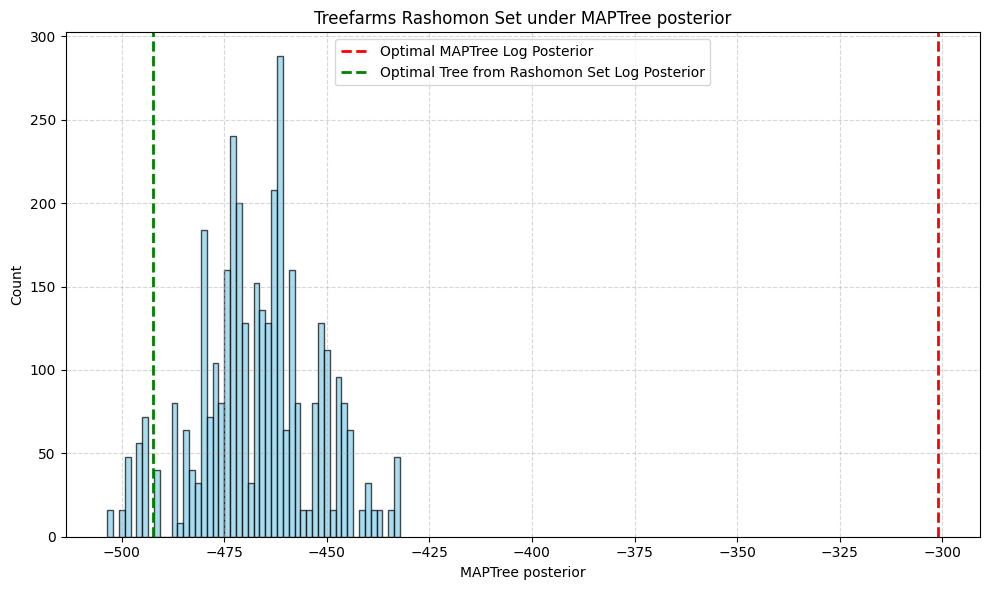

In [83]:
# tree_1.log_posterior(X, y, **POSTERIOR)
# ttt_treefarms_rset_maptree_posts
# optimal treefarms tree's log posterior
opt_treefarms_post = make_bct(treefarms_opt_ttt_dict).log_posterior(X, y, **POSTERIOR)
opt_maptree_post = tree_1.log_posterior(X, y, **POSTERIOR)

plt.figure(figsize=(10, 6))
plt.hist(ttt_treefarms_rset_maptree_posts.values(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
plt.axvline(opt_treefarms_post, color='green', linestyle='--', linewidth=2, label='Optimal Tree from Rashomon Set Log Posterior')

plt.title("Treefarms Rashomon Set under MAPTree posterior")
plt.xlabel("MAPTree posterior")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
def relabel(tree_dict):
    if not isinstance(tree_dict, dict):
        return tree_dict

    new_dict = {}
    for key, value in tree_dict.items():
        if key == "left":
            new_dict["false"] = relabel(value)
        elif key == "right":
            new_dict["true"] = relabel(value)
        else:
            new_dict[key] = relabel(value)
    return new_dict
maptree_opt_tree_dict = parse_tree(tree_1, X, y)
maptree_opt_tree_dict = relabel(maptree_opt_tree_dict)

In [21]:
maptree_opt_tree_dict

{'feature': 13,
 'false': {'feature': 7,
  'false': {'feature': 19,
   'false': {'prediction': 1},
   'true': {'feature': 1,
    'false': {'feature': 25,
     'false': {'prediction': 1},
     'true': {'feature': 22,
      'false': {'prediction': 1},
      'true': {'prediction': 0}}},
    'true': {'feature': 10,
     'false': {'prediction': 1},
     'true': {'prediction': 0}}}},
  'true': {'feature': 1,
   'false': {'feature': 25,
    'false': {'prediction': 1},
    'true': {'feature': 16,
     'false': {'prediction': 1},
     'true': {'prediction': 0}}},
   'true': {'feature': 4,
    'false': {'prediction': 1},
    'true': {'prediction': 0}}}},
 'true': {'feature': 8,
  'false': {'feature': 20,
   'false': {'prediction': 0},
   'true': {'feature': 2,
    'false': {'feature': 26,
     'false': {'prediction': 0},
     'true': {'feature': 23,
      'false': {'prediction': 0},
      'true': {'prediction': 1}}},
    'true': {'feature': 11,
     'false': {'prediction': 0},
     'true': {'pre

In [16]:
# some stuff was saved as numpy and json did not like that
def convert_numpy(obj):
    if isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, set):
        return list(obj)
    raise TypeError(f"Type {type(obj)} not serializable")

with open('maptree_dict.json', 'w') as file:
    json.dump(maptree_opt_tree_dict, file, indent=4, default=convert_numpy)

In [23]:
with open(f"{homepath}/ttt_treefarms_rset_objs.json", 'r') as file:
    ttt_treefarms_rset_objs = json.load(file)

In [22]:
maptree_tf_obj = 0.26592901878914404

In [24]:
min(ttt_treefarms_rset_objs.values())

0.258329853862213

In [25]:
with open(f"{homepath}/ttt_treefarms_rset.json", 'r') as file:
    ttt_treefarms_rset = json.load(file)
ttt_treefarms_rset_maptree = {k: make_bct(v) for k, v in ttt_treefarms_rset.items()}
ttt_treefarms_rset_maptree_posts = {k: v.log_posterior(X, y, **POSTERIOR) \
                                    for k, v in ttt_treefarms_rset_maptree.items()}

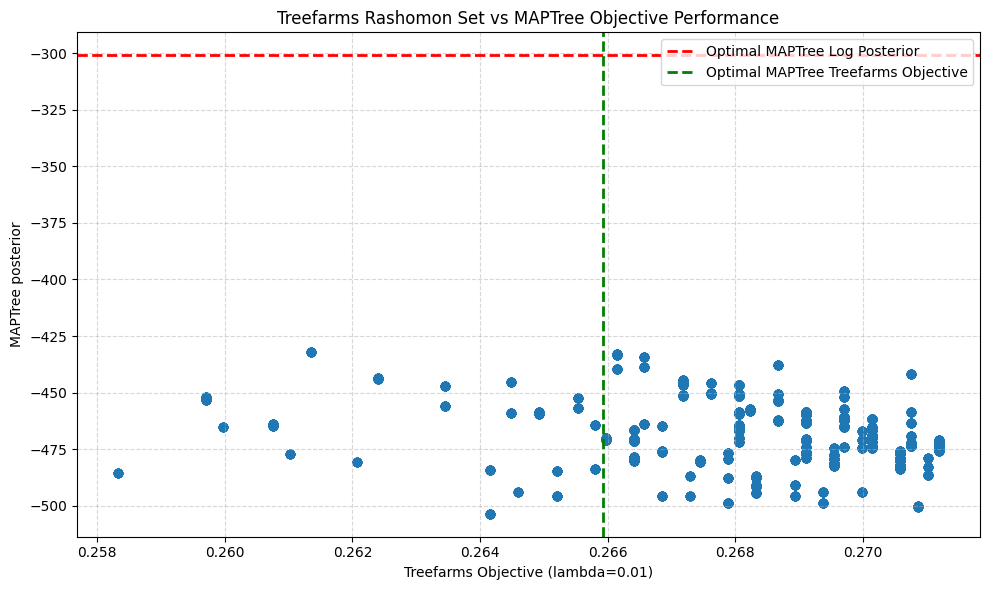

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(ttt_treefarms_rset_objs.values(),
         ttt_treefarms_rset_maptree_posts.values()
         )
plt.axhline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
plt.axvline(maptree_tf_obj, color='green', linestyle='--', linewidth=2, label='Optimal MAPTree Treefarms Objective')

plt.title("Treefarms Rashomon Set vs MAPTree Objective Performance")
plt.xlabel("Treefarms Objective (lambda=0.01)")
plt.ylabel("MAPTree posterior")
plt.legend(loc = "upper right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()